# `Modules`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from  sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import pickle
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.model_selection import RandomizedSearchCV
# _____________________________________________________________________________________________________________________________
boston=load_boston()
boston_df=pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"]=pd.Series(boston["target"])
heart_disease=pd.read_csv("heart-disease.csv")
heart_disease.head()
from sklearn.ensemble import RandomForestClassifier
np.random.seed(2)
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)
rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_test, y_test)

0.8852459016393442

In [2]:
rfc.predict_proba(x_test[:5]) # predict proba returns the probability of classification lable

array([[0.17, 0.83],
       [0.49, 0.51],
       [0.29, 0.71],
       [0.11, 0.89],
       [0.73, 0.27]])

In [4]:
# in above array the left column is for 0 an the right one is for 1. when the probabilit of left column in ggreater than the 
# right one its mean the answere is 0 and viceversa
rfc.predict(x_test[:5])

array([1, 1, 1, 1, 0], dtype=int64)

# Making predictions with our model

In [5]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
np.random.seed(2)
x=boston_df.drop("target", axis=1)
y=boston_df["target"]

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)
model=RandomForestRegressor().fit(x_train, y_train)

# Make Predictions 
y_preds=model.predict(x_test)

In [7]:
y_preds[:10]

array([21.37 , 20.983, 33.335, 30.914,  8.187, 13.09 , 26.739, 28.367,
       27.02 , 20.631])

In [8]:
np.array(y_test[:10])

array([20.2, 15.3, 37.3, 32.5,  8.8, 14.4, 22. , 26.6, 15. , 21.5])

In [9]:
# It tell us the average difference between the value of y we predict and the actual value of y
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

2.0778039215686266

In [10]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [11]:
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2)

clf=RandomForestClassifier().fit(x_train, y_train)

clf.score(x_test, y_test)

0.7213114754098361

# cross_val_score function

* it perform meachine learning methord `5` times with each time different train and test split

In [12]:
cross_val_score(clf, x, y, cv=5)

array([0.81967213, 0.90163934, 0.7704918 , 0.78333333, 0.76666667])

In [13]:
np.random.seed(2)

# this is the normal score methord
singal_score=clf.score(x_test, y_test)

# this the advance score methord
multi_score=np.mean(cross_val_score(clf, x, y, cv=100))

singal_score, multi_score


(0.7213114754098361, 0.8116666666666668)

# Classification model evualation matrics

**calculation of accuracy of our machine learning model**

* Accuracy
* Area under ROC curve
* Confussion matric
* Classification report

### `Accuracy`

In [31]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
np.random.seed(2)
x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()

cvs=cross_val_score(clf, x, y, cv=5)

In [34]:
# mean accuracy of our model
np.mean(cvs)

0.8215846994535518

In [36]:
print(f"Heart disease Classifier accurcy is {np.mean(cvs)*100:.2f}%")

Heart disease Classifier accurcy is 82.16%


### `Area under the reciever operating characteristic curve (AUC/ROC)`

* Area under curve (AUC)
* ROC curve

**ROC** is the comparison of models true positive rate (tpr) and models false posotive rate (fpr)

In [5]:
from sklearn.metrics import roc_curve
np.random.seed(2)
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
clf.fit(x_train, y_train)
y_prob=clf.predict_proba(x_test)

In [43]:
y_prob[:10]

array([[0.17, 0.83],
       [0.49, 0.51],
       [0.29, 0.71],
       [0.11, 0.89],
       [0.73, 0.27],
       [0.89, 0.11],
       [0.22, 0.78],
       [0.31, 0.69],
       [0.91, 0.09],
       [0.51, 0.49]])

* as the ROC is the comparision of true positive and fale positive so we only want positive rate
* if the positive side is greater then the negative side then it is true positive 
* if the positive side is smaller then the negative side then it is false positive

In [46]:
y_probs_positive=y_prob[:, 1]
y_probs_positive[:10]

array([0.83, 0.51, 0.71, 0.89, 0.27, 0.11, 0.78, 0.69, 0.09, 0.49])

now we calculate tpr and fpr

In [69]:
fpr, tpr, thresholds=roc_curve(y_test, y_prob_positive)

fpr

array([0.     , 0.03125, 0.0625 , 0.125  , 0.1875 , 0.25   , 0.25   ,
       0.28125, 0.375  , 0.4375 , 0.5    , 0.5    , 0.53125, 0.53125,
       0.5625 , 0.5625 , 0.625  , 0.625  , 0.71875, 0.75   , 0.8125 ,
       0.8125 , 0.875  , 0.875  , 0.90625, 0.90625, 0.90625, 0.96875,
       1.     ])

###### Ploting ROC curve

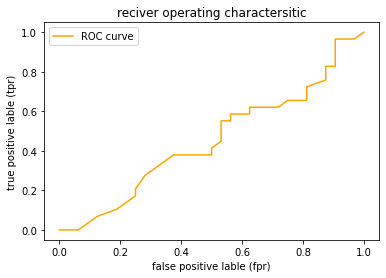

In [70]:
def plot_roc_curve(fpr, tpr):
    '''
    ploting a graph with false positive rate fpr and 
    true positive rate tpr
    '''
#     ploting curve
    plt.plot(fpr, tpr, color='orange', label='ROC curve')
    
#     ploting line
#     plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guess Line') # the x and y both has value b/w 1 and 0
    
    plt.xlabel("false positive lable (fpr)")
    plt.ylabel("true positive lable (tpr)")
    plt.title("reciver operating charactersitic")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

In [71]:
roc_auc_score(y_test, y_probs_positive)

0.947198275862069

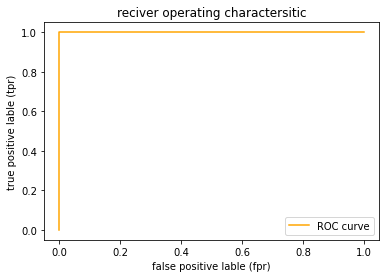

In [72]:
# idol roc curve
fpr, tpr, threshoulds=roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

In [74]:
# idol area under the idol roc curve is 1
roc_auc_score(y_test, y_test)

1.0

### `Confusion matric`

* a uick way to compare model's predict values and the actual values
* it gives the idea where the model get confeused

In [8]:
y_preds=clf.predict(x_test)
confusion_matrix(y_preds, y_test)

array([[26,  1],
       [ 6, 28]], dtype=int64)

In [9]:
pd.crosstab(y_test, y_preds, rownames=["actual value"], colnames=["predict value"])

predict value,0,1
actual value,,
0,26,6
1,1,28


* we have 6 cases when the actual value is 1 and preicts value is also 1
* and we have 28 cases when actual and predicts value is 0 
* so the total no of values which is gueesed correctly by our model is 26 + 28 = 45

In [85]:
26 + 6 + 1 + 28

61

In [87]:
len(y_test) # hence both are same

61

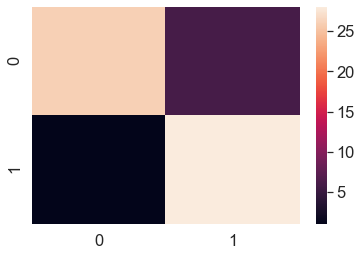

In [12]:
import seaborn as sns
# sns.set(font_scale=1.5) 
conf_mat=confusion_matrix(y_test, y_preds)
sns.heatmap(conf_mat);

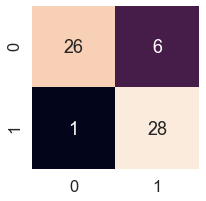

In [21]:
def plot_conf_matrix(conf_mat):
    fig, axs=plt.subplots(figsize=(3,3))
    axs=sns.heatmap(conf_mat, annot=True, cbar=False)
    plt.xlable="True label"
    plt.ylable="Predicted label"
    plt.title="Heat mep"
    
plot_conf_matrix(conf_mat)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.96      0.81      0.88        32
           1       0.82      0.97      0.89        29

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.88        61



# Regression model evualation matrics

1. R^2 (r square) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean square error

cross_val_score(clf, x, y, cv=5, **scoring=None**)

### `R^2`

compare the predictions with the mean of the y_test

In [30]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(2)
x=boston_df.drop("target", axis=1)
y=boston_df["target"]
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestRegressor()
clf.fit(x_train, y_train);

In [32]:
clf.score(x_test, y_test)

0.9038944829540848

In [38]:
from sklearn.metrics import r2_score

y_test_mean=np.full(len(y_test), y_test.mean()) # this will create the new list of same lenght as of y_test and fill it with y_mean

In [39]:
y_test.mean()

22.895098039215693

In [42]:
y_test_mean[:10]

array([22.89509804, 22.89509804, 22.89509804, 22.89509804, 22.89509804,
       22.89509804, 22.89509804, 22.89509804, 22.89509804, 22.89509804])

In [43]:
# as y_test and y_test_mena are not same so the answere is 0
r2_score(y_test, y_test_mean)

0.0

In [44]:
# as y_tets and y_test are two same so the answere is 1
r2_score(y_test, y_test)

1.0

### `Mean absolute error (MAE)`

* MAE is the average difference beetween the actual values and the predictions

In [50]:
from sklearn.metrics import mean_absolute_error

y_preds=clf.predict(x_test)

mae=mean_absolute_error(y_test, y_preds)
mae

2.0778039215686266

every prediction we made is on everage **+2.0778039215686266** or **-2.0778039215686266** away from the actual values

In [53]:
# visualize the actual values vs the predicted values
df=pd.DataFrame(data={"actual values":y_test, "predicted values":y_preds})
df

,actual values,predicted values
463,20.2,21.370
152,15.3,20.983
291,37.3,33.335
183,32.5,30.914
384,8.8,8.187
...,...,...
200,32.9,34.303
12,21.7,20.849
129,14.3,16.092
194,29.1,28.888


In [56]:
# now we see the difference between the actual values(y_test), and the predicted values(y_preds)
df["difference"]=df["actual values"]- df["predicted values"]
df

# mean absolute error:
#     convert the difference in to positive
#     take the mena of it

,actual values,predicted values,difference
463,20.2,21.370,-1.170
152,15.3,20.983,-5.683
291,37.3,33.335,3.965
183,32.5,30.914,1.586
384,8.8,8.187,0.613
...,...,...,...
200,32.9,34.303,-1.403
12,21.7,20.849,0.851
129,14.3,16.092,-1.792
194,29.1,28.888,0.212


### `Mean squared error (MSE)`

MSE take difference fromm the above table, suared them, take the sum of all, find the mean of it

In [65]:
from sklearn.metrics import mean_squared_error

y_preds=clf.predict(x_test)
mse=mean_squared_error(y_test, y_preds)
mse

829.8948916065568

In [66]:
square=np.square(df["difference"])
square.mean()

8.04015698039215

# scoring parameter
**cross_val_score(clf, x, y, cv=5, scoring=None)**

### `for classification model`

In [70]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

clf=RandomForestClassifier()

scoring = **`None`**

In [80]:
np.random.seed(2)
cv_acc=cross_val_score(clf, x, y, cv=5, scoring=None)
cv_acc

array([0.85245902, 0.8852459 , 0.78688525, 0.81666667, 0.76666667])

In [81]:
print(f"cross validation score accuracy is = {cv_acc.mean()*100}%")

cross validation score accuracy is = 82.15846994535518%


scoring = **``accuracy``**

In [85]:
np.random.seed(2)
cv_acc=cross_val_score(clf, x, y, cv=5, scoring="accuracy")
cv_acc.mean()*100

82.15846994535518

scoring = **`precision`**

In [87]:
np.random.seed(2)
cv_acc=cross_val_score(clf, x, y, cv=5, scoring="precision")
cv_acc.mean()*100

82.02457264957266

### `for regressor model`

In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

np.random.seed(2)
x=boston_df.drop("target", axis=1)
y=boston_df["target"]

clf=RandomForestRegressor()

scoring = **`None`**

In [6]:
np.random.seed(2)
cv_r2=cross_val_score(clf, x, y, cv=5, scoring=None)
cv_r2.mean()*100

63.980502624175216

scoring = **`neg_mean_absolute_error`**

In [7]:
np.random.seed(2)
cv_r2=cross_val_score(clf, x, y, cv=5, scoring="neg_mean_absolute_error")
cv_r2.mean()*100

-294.49863521646273

scoring = **`neg_mean_squared_error`**

In [9]:
np.random.seed(2)
cv_r2=cross_val_score(clf, x, y, cv=5, scoring="neg_mean_squared_error")
cv_r2.mean()*100

-2069.5318054067166

# Differenet evualation matrics as sckitlearn function 

### `Classification evualation function`

In [28]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(2)

x=heart_disease.drop("target", axis=1)
y=heart_disease["target"]

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)
clf=RandomForestClassifier()
clf.fit(x_train, y_train);

y_preds=clf.predict(x_test)

print(f"accuracy : {accuracy_score(y_test, y_preds)*100}, \nprecision : {precision_score(y_test, y_preds)*100}, \nrecall : {recall_score(y_test, y_preds)*100}, \nf1 : {f1_score(y_test, y_preds)*100}")

accuracy : 88.52459016393442, 
precision : 82.35294117647058, 
recall : 96.55172413793103, 
f1 : 88.8888888888889


### `Regression evualation function`

In [50]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(2)
x=boston_df.drop("target", axis=1)
y=boston_df["target"]

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2)

clf=RandomForestRegressor()

clf.fit(x_train, y_train)

y_preds=clf.predict(x_test)

print(f"r2_score : {r2_score(y_test, y_preds)*100} \nmean_absolute_error : {mean_absolute_error(y_test, y_preds)*100} \nmean_squared_error : {mean_squared_error(y_test, y_preds)*100}")

r2_score : 90.38944829540849 
mean_absolute_error : 207.78039215686266 
mean_squared_error : 804.0156980392153


# **improving a model**

In [52]:
clf=RandomForestClassifier()
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


**We're going to try and adjust:**

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [2]:
def evaluat_preds(y_test, y_preds):
#     it should compare with y_valid not with y_test because y_preds is made from x_valid
    accuracy=accuracy_score(y_test, y_preds)
    precision=precision_score(y_test, y_preds)
    recall=recall_score(y_test, y_preds)
    f1=f1_score(y_test, y_preds)
    
    metric_dict={"accuracy":round(accuracy, 2),
         "precision":round(precision, 2),
         "recall":round(recall, 2),
         "f1":round(f1, 2)}
    
    print(f"Acc: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [3]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(2)

# shuffling the data
heart_disease_shffuled=heart_disease.sample(frac=1)

heart_disease_shffuled.drop("target", axis=1)
y=heart_disease_shffuled["target"]


# split heart_disease in to train, test, valid
train_split=round(0.7 * len(heart_disease_shffuled)) 
valid_split=round(train_split + 0.15 * len(heart_disease_shffuled))
x_train, y_train = x[:train_split], y[:train_split]
x_valid, y_valid = x[train_split:valid_split], y[train_split:valid_split]
x_test, y_test = x[valid_split:], y[valid_split:]

len(x_train), len(x_valid), len(x_test)


clf=RandomForestClassifier()

clf.fit(x_train, y_train)

# just like we mae prdictions on x_test, here we made predictions on x_valid
y_preds = clf.predict(x_valid)

baseline_metric=evaluat_preds(y_valid, y_preds)

Acc: 51.11%
Precision: 0.59
Recall: 0.50
F1 score: 0.54


In [4]:
len(x_train), len(x_valid), len(x_test)

(212, 45, 46)

In [5]:
len(y_train), len(y_valid), len(y_test)

(212, 45, 46)

# RandomizedSearchCV

nothing but the way of selecting right parameter values for RandomForestClassifier which can increase the accuracy of model

RandomizedSearchCV(est, param_distrebution, n_jobs, n_iter, cv)

* **est** = RandomForestClassifier()
* **param_dister** = distionary of values
* **n_jobs** = processor assigned

In [6]:
from sklearn.model_selection import RandomizedSearchCV

grid={"n_estimators" : [10,100,200,500,1000,200],
     "max_depth" : [None, 5, 10, 20, 30],
     "max_features" : ["ato", "sqrt"],
     "min_sample_split" : [2, 4, 6],
     "min_sample_leaf" : [1,2,4]}

np.random.seed(2)

x=heart_disease_shffuled.drop("target", axis=1)
y=heart_disease_shffuled["target"]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

clf = RandomForestClassifier(n_jobs=1)


# n_iter is the no of random selection of combinations in grid dictionary
rs_clf=RandomizedSearchCV(estimator=clf, param_distributions=grid, n_iter=10, cv=5, verbose=2) 
# rs_clf.fit(x_train, y_train);

In [7]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
        "max_depth": [None, 5, 10, 20, 30],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(42)

# Split into X & y
X = heart_disease_shffuled.drop("target", axis=1)
y = heart_disease_shffuled["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   3.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.1s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   4.0s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.3s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

In [8]:
# best_params gie the paremeter's value combination's of which give the best result
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 10}

In [9]:
rs_y_preds = rs_clf.predict(x_test)

rs_metrics=evaluat_preds(y_test, rs_y_preds)

Acc: 80.33%
Precision: 0.79
Recall: 0.89
F1 score: 0.84


In [15]:
grid_2 = {"n_estimators": [100, 200],
        "max_depth": [10],
        "max_features": ["auto", "sqrt"],
        "min_samples_split": [2],
        "min_samples_leaf": [1, 2]}

In [23]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# Split into X & y
X = heart_disease_shffuled.drop("target", axis=1)
y = heart_disease_shffuled["target"]

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# Setup RandomizedSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
gs_clf.fit(x_train, y_train);

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.5s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.6s
[CV] END max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200;

In [24]:
gs_clf.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 100}

In [25]:
gs_y_preds=gs_clf.predict(x_test)

gs_metric = evaluat_preds(y_test, gs_y_preds)

Acc: 77.05%
Precision: 0.77
Recall: 0.86
F1 score: 0.81


# Saving and loading machine learning models

### pickel module

In [29]:
import pickle

pickle.dump(gs_clf, open("gs_random_model.pkl", "wb"))

In [ ]:
loaded_pickle_model=pickle.load(open("gs_random_model.pkl", "rb"))